In [7]:
from exp1_Datapipeline import Datapipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [8]:
models = [DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), LogisticRegression(random_state=42, max_iter=3000), XGBClassifier(random_state=42)]

In [9]:
df = pd.read_csv('../train.csv')
labels = df['Churn']
df = df.drop('Churn', axis='columns')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9008 entries, 0 to 9007
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   8839 non-null   float64
 1   City_Tier                8913 non-null   float64
 2   CC_Contacted_LY          8922 non-null   float64
 3   Payment                  8917 non-null   object 
 4   Gender                   8924 non-null   object 
 5   Service_Score            8932 non-null   float64
 6   Account_user_count       8661 non-null   float64
 7   account_segment          8937 non-null   object 
 8   CC_Agent_Score           8918 non-null   float64
 9   Marital_Status           8836 non-null   object 
 10  rev_per_month            8373 non-null   float64
 11  Complain_ly              8713 non-null   float64
 12  rev_growth_yoy           9005 non-null   float64
 13  coupon_used_for_payment  9006 non-null   float64
 14  Day_Since_CC_connect    

In [11]:
pl = Datapipeline(df)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

KeyError: "['Login_device'] not found in axis"

In [ ]:
scores_acc = []
scores_pre = []
scores_recall = []
scores_f1 = []

for model in models:
    pl = Datapipeline()
    pl.steps.append(['classifier', model])
    acc_score = cross_val_score(pl, df, labels, scoring='accuracy', cv=skf)
    scores_acc.append(acc_score)

    pre_score = cross_val_score(pl, df, labels, scoring='precision', cv=skf)
    scores_pre.append(pre_score)

    recall_score = cross_val_score(pl, df, labels, scoring='recall', cv=skf)
    scores_recall.append(recall_score)

    f1_score = cross_val_score(pl, df, labels, scoring='f1', cv=skf)
    scores_f1.append(f1_score)

In [ ]:
model_names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 'XGBClassifier']

In [ ]:
def box_plot_score(score, score_name, model_names = model_names):
    plt.figure(figsize=(8, 4))
    plt.boxplot(score)
    plt.xlabel('Model', fontsize=5)
    plt.ylabel('Score', fontsize=5)
    plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=8)
    plt.title(score_name, fontsize=5)

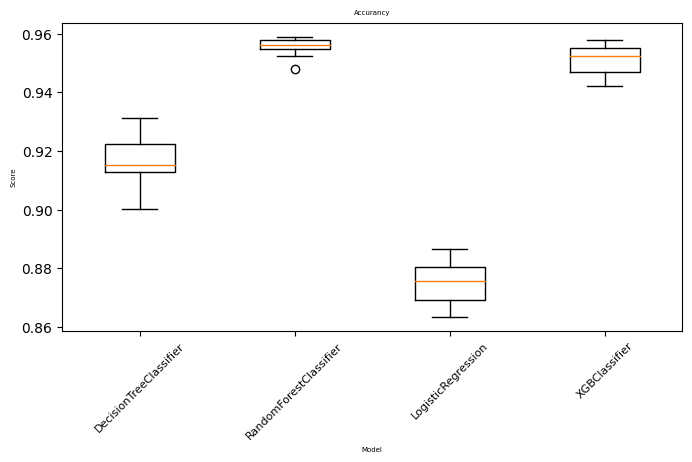

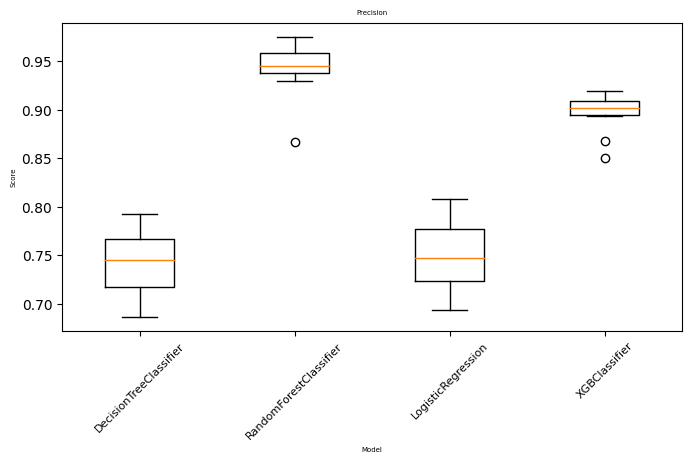

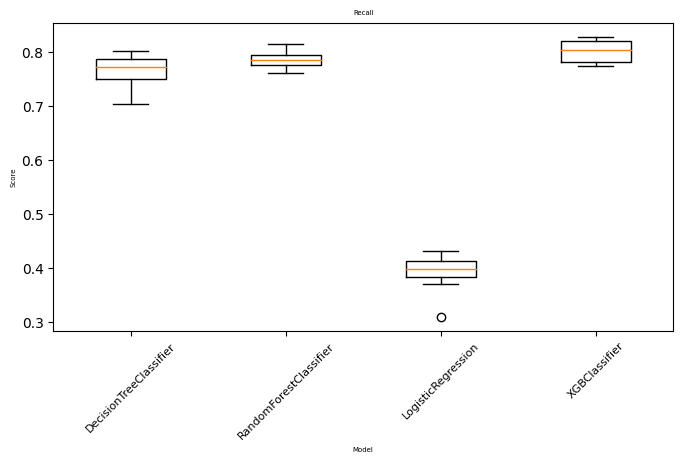

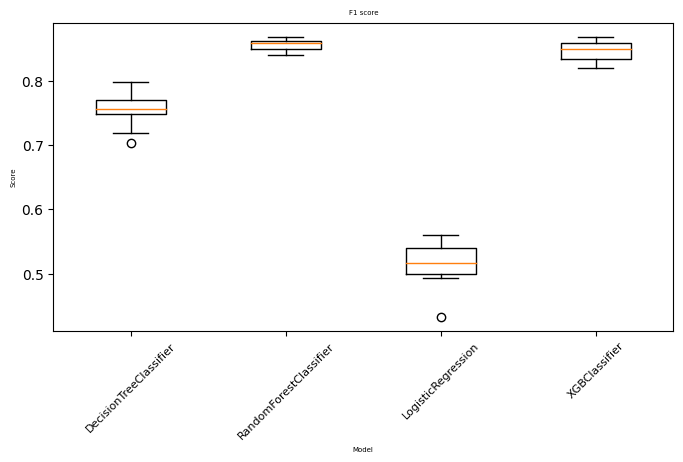

In [ ]:
box_plot_score(scores_acc, "Accurancy")
box_plot_score(scores_pre, "Precision")
box_plot_score(scores_recall, "Recall")
box_plot_score(scores_f1, "F1 score")

In [ ]:
for i in range(len(model_names)):
    print(model_names[i])
    print("\tAcc: {:.2f}\tPre: {:.2f}\tRecall: {:.2f}\tF1: {:.2f}".format(np.mean(scores_acc[i]), np.mean(scores_pre[i]), np.mean(scores_recall[i]), np.mean(scores_f1[i])))
    

DecisionTreeClassifier
	Acc: 0.92	Pre: 0.74	Recall: 0.77	F1: 0.75
RandomForestClassifier
	Acc: 0.96	Pre: 0.94	Recall: 0.79	F1: 0.86
LogisticRegression
	Acc: 0.88	Pre: 0.75	Recall: 0.39	F1: 0.51
XGBClassifier
	Acc: 0.95	Pre: 0.90	Recall: 0.80	F1: 0.85
